*Purpose:* Analysis of full cell cycle time-series data </br>
*Author:* Andreas Brunner, EMBL, Heidelberg  </br>
*Last update:* 2024-03

# Import all required libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from FCC_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# for statistical testing
from scipy import stats
import pylab

In [2]:
# Specify_colors 
SMC4_color = '#4169E1' #'royalblue'
NCAPH_color = '#1E90FF' # 'dodgerblue'
NCAPH2_color = '#6495ED' # 'cornflowerblue'
CTCF_color = '#FF1493' #'deeppink'
RAD21_color = '#008000' # 'green'
STAG1_color = '#32CD32' # 'limegreen'
STAG2_color = '#228B22' # 'forestgreen'
grey_color = '#808080' # 'grey'

# Process segmented time-series data
(currently commented out, in order to start right from already processed files)

In [3]:
# S-phase synchronized data:
SMC4_cells_to_keep = [1,2,3,6,9,12,14,16,25,26]
NCAPH_cells_to_keep = [4,5,6,10,12,16,18,19]
NCAPH2_cells_to_keep = [1,2,3,5,6,8,13,14,15,17,18,19,20,21,24,25,28,29,31,32,33]
CTCF_cells_to_keep = [1,2,3,7,8,11,13,14,15,16,17,22]
RAD21_cells_to_keep = [1,2,5,11,12,13,14,15,16,22,24,28,30]
STAG1_cells_to_keep = [1,5,7,9,10,11,12,14,15,18,19,21,24,25,26,28,29,31,35,37,38]
STAG2_cells_to_keep = [2,8,11,12,14,15,18,19,21,22,27,29,34]

# Unsynchronized data:
NCAPH2_unsync_keep = [2,4,5,8,11,12,17,21,22,27,28,31]
STAG2_unsync_keep = [1,2,5,13,41]

### Define main function to process time series data: import, naming, filtering, cropping, alignment

In [4]:
def run(path, datasheet, filesep, POI_name_long, POI_name_short, N_intervals, what_to_plot, what_to_plot_cell, what_to_plot_nuc, 
        cells_to_keep, crop_cell_vol, crop = None, crop_nuc_vol = None):
    #loading the data:
    df = read_df(path, datasheet, filesep)
    df = name_df(df, POI_name_long, N_intervals)
    
    #annotating cells to discern individual time-series:
    annotating_cells(df, N_intervals)

# filter out faulty/duplicate time-series:
    df_filtered = remove_time_series(df, cells_to_keep, what_to_plot_cell, what_to_plot_nuc, POI_name_long, N_intervals)
    df_filtered = name_df(df_filtered, POI_name_long, N_intervals)
    
    # crop to full cell cycles:
    if crop == "Vol_cell_mic3_only":
        df_cropped, cell_cycle_durations = crop_to_cell_cycle_cell_vol(df_filtered, crop_cell_vol)
    else: 
        df_cropped, cell_cycle_durations = crop_to_cell_cycle(df_filtered, crop_cell_vol, crop_nuc_vol)
    
# align full cell cycles and check
    df_aligned = align_cell_cycles(df_cropped)
    df_aligned.name = df_filtered.name

    return df_aligned, cell_cycle_durations

### Analyze time-series data synchronized by S-phase arrest

In [5]:
path = "C:\\GIT\\MExit_Brunner_2024\\Data\\01_Full_cell_cycle_imaging\\01_time-series_data"
cell_cycle_durations_all = list()

# SMC4
SMC4_aligned, cell_cycle_duration_SMC4 = run(path, "Extracted_parameters_combined_SMC4.txt", "\t", "All Condensins (SMC4)", "SMC4", 163, 
"N_nuc", "N_cell", "N_nuc", SMC4_cells_to_keep, crop_cell_vol = 1.8, crop_nuc_vol = 1.65)
cell_cycle_durations_all.append(cell_cycle_duration_SMC4)

# NCAPH
NCAPH_aligned, cell_cycle_duration_NCAPH = run(path, "Extracted_parameters_combined_NCAPH.txt", "\t", "Condensin I (NCAPH)", "NCAPH", 166, 
"N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", NCAPH_cells_to_keep, crop_cell_vol = 1.7, crop_nuc_vol = 1.55)
cell_cycle_durations_all.append(cell_cycle_duration_NCAPH)

# NCAPH2
NCAPH2_aligned, cell_cycle_duration_NCAPH2 = run(path, "Extracted_parameters_combined_NCAPH2.txt", "\t", "Condensin II (NCAPH2)", "NCAPH2", 200, 
"N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", NCAPH2_cells_to_keep, crop = "Vol_cell_mic3_only", crop_cell_vol = 1.45)
cell_cycle_durations_all.append(cell_cycle_duration_NCAPH2)

# CTCF
CTCF_aligned, cell_cycle_duration_CTCF = run(path, "Extracted_parameters_combined_CTCF.txt", "\t", "CTCF", "CTCF", 153, 
"N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", CTCF_cells_to_keep, crop = "Vol_cell_mic3_only", crop_cell_vol = 1.5)
cell_cycle_durations_all.append(cell_cycle_duration_CTCF)

# RAD21
RAD21_aligned, cell_cycle_duration_RAD21 = run(path, "Extracted_parameters_combined_RAD21.txt", "\t", "All Cohesins (RAD21)", "RAD21", 163, 
"N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", RAD21_cells_to_keep, crop_cell_vol = 1.8, crop_nuc_vol = 1.5)
cell_cycle_durations_all.append(cell_cycle_duration_RAD21) 

# STAG1
STAG1_aligned, cell_cycle_duration_STAG1 = run(path, "Extracted_parameters_combined_STAG1.txt", "\t", "Cohesin STAG1", "STAG1", 168, 
"N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", STAG1_cells_to_keep, crop = "Vol_cell_mic3_only", crop_cell_vol = 1.5)
cell_cycle_durations_all.append(cell_cycle_duration_STAG1)

# STAG2
STAG2_aligned, cell_cycle_duration_STAG2 = run(path, "Extracted_parameters_combined_STAG2.txt", "\t", "Cohesin STAG2", "STAG2", 153, 
"N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", STAG2_cells_to_keep, crop = "Vol_cell_mic3_only", crop_cell_vol = 1.5)
cell_cycle_durations_all.append(cell_cycle_duration_STAG2)

Plot average cell cycle duration

In [16]:
cell_cycle_durations_all_flat = [item for sublist in cell_cycle_durations_all for item in sublist]
cell_cycle_durations_all_hours = [x/60 for x in cell_cycle_durations_all_flat]
avg_cell_cycle = np.mean(cell_cycle_durations_all_hours)
# sns.violinplot(y = cell_cycle_durations_all_hours)
# plt.ylabel('average cell cycle duration')
# print('Average cell cycle duration: ' + str(avg_cell_cycle))

## Analyze time-series data of asynchronous cells

In [7]:
path = "C:\\GIT\\MExit_Brunner_2024\\Data\\01_Full_cell_cycle_imaging\\01_time-series_data"
cell_cycle_durations_unsync_all = list()

# STAG2 unsynchronized:
STAG2_unsync_aligned, cell_cycle_duration_STAG2_unsync = run(path, "Extracted_parameters_combined_SA2_unsync.txt", "\t", "Cohesin STAG2 unsync", "STAG2 US", 210, "N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", STAG2_unsync_keep, crop = "Vol_cell_mic3_only", crop_cell_vol = 1.5)
cell_cycle_duration_STAG2_unsync_hours = [x/60 for x in cell_cycle_duration_STAG2_unsync]
cell_cycle_durations_unsync_all.append(cell_cycle_duration_STAG2_unsync)

# NCAPH2 unsynchronized:
NCAPH2_unsync_aligned, cell_cycle_duration_NCAPH2_unsync = run(path, "Extracted_parameters_combined_NCAPH2_unsync.txt", "\t", "NCAPH2 unsync", "NCAPH2 US", 266, 
"N_nuc", "Vol_cell_mic3", "Vol_nuc_mic3", cells_to_keep = NCAPH2_unsync_keep, crop = "Vol_cell_mic3_only", crop_cell_vol = 1.4)
cell_cycle_duration_NCAPH2_unsync_hours = [x/60 for x in cell_cycle_duration_NCAPH2_unsync]
cell_cycle_durations_unsync_all.append(cell_cycle_duration_NCAPH2_unsync)

Again plot cell cycle duration information

In [17]:
# cell_cycle_durations_unsync_all_flat = [item for sublist in cell_cycle_durations_unsync_all for item in sublist]
# cell_cycle_durations_all_unsync_hours = [x/60 for x in cell_cycle_durations_unsync_all_flat]
# avg_cell_cycle_unsync = np.mean(cell_cycle_durations_all_unsync_hours)
# fig, ax = plt.subplots(1,1)
# sns.violinplot(y = cell_cycle_durations_all_unsync_hours, ax = ax)
# sns.violinplot(y = cell_cycle_duration_STAG2_unsync_hours, color = 'green', ax = ax)
# sns.violinplot(y = cell_cycle_duration_NCAPH2_unsync_hours, color = 'pink', ax = ax)
# plt.setp(ax.collections, alpha=.6)
# plt.ylabel('average cell cycle duration')
# print('Average cell cycle duration: ' + str(avg_cell_cycle_unsync))

### Interpolation

In [9]:
SMC4_interpolated = interpolate_time_series(SMC4_aligned, avg_cell_cycle)
NCAPH_interpolated = interpolate_time_series(NCAPH_aligned, avg_cell_cycle)
NCAPH2_interpolated = interpolate_time_series(NCAPH2_aligned, avg_cell_cycle)
CTCF_interpolated = interpolate_time_series(CTCF_aligned, avg_cell_cycle)
RAD21_interpolated = interpolate_time_series(RAD21_aligned, avg_cell_cycle)
STAG1_interpolated = interpolate_time_series(STAG1_aligned, avg_cell_cycle)
STAG2_interpolated = interpolate_time_series(STAG2_aligned, avg_cell_cycle)

## UNSYNCHRONIZED: (no 15h S-phase arrest prior to imaging)
STAG2_US_interpolated = interpolate_time_series(STAG2_unsync_aligned, avg_cell_cycle)
NCAPH2_US_interpolated = interpolate_time_series(NCAPH2_unsync_aligned, avg_cell_cycle)

In [10]:
# for comparison of actual average division time:
NCAPH2_interpolated_avg_t = interpolate_time_series(NCAPH2_aligned, np.mean(cell_cycle_duration_NCAPH2)/60)
STAG2_interpolated_avg_t = interpolate_time_series(STAG2_aligned, np.mean(cell_cycle_duration_STAG2)/60)

### UNSYNCHRONIZED:
STAG2_US_interpolated_avg_t = interpolate_time_series(STAG2_unsync_aligned, np.mean(cell_cycle_duration_STAG2_unsync)/60)
NCAPH2_US_interpolated_avg_t = interpolate_time_series(NCAPH2_unsync_aligned, np.mean(cell_cycle_duration_NCAPH2_unsync)/60) 

# Normalize FCC data by MExit data

### Based on metaphase chromatin concentration (used for concentration plots)

In [19]:
#load avgerage con-nuc data for all POI
path = r"C:\\GIT\\MExit_Brunner_2024\\Data\\01_Full_cell_cycle_imaging\\02_MExit_normalization"
avg_con_meta = pd.read_csv(os.path.join(path,'Avg_metaphase_Con_nuc_nM.csv'))
print(avg_con_meta)

RAD21_interpolated_norm_con_nuc = MExit_normalize_con_nuc(RAD21_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="RAD21"].iloc[0]))
STAG1_interpolated_norm_con_nuc = MExit_normalize_con_nuc(STAG1_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="STAG1"].iloc[0]))
STAG2_interpolated_norm_con_nuc = MExit_normalize_con_nuc(STAG2_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="STAG2"].iloc[0]))
CTCF_interpolated_norm_con_nuc = MExit_normalize_con_nuc(CTCF_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="CTCF"].iloc[0]))
SMC4_interpolated_norm_con_nuc = MExit_normalize_con_nuc(SMC4_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="SMC4"].iloc[0]))
NCAPH_interpolated_norm_con_nuc = MExit_normalize_con_nuc(NCAPH_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="NCAPH"].iloc[0]))
NCAPH2_interpolated_norm_con_nuc = MExit_normalize_con_nuc(NCAPH2_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="NCAPH2"].iloc[0]))

### UNSYNCHRONIZED DATA
NCAPH2_US_interpolated_norm = MExit_normalize_con_nuc(NCAPH2_US_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="NCAPH2"].iloc[0]))
STAG2_US_interpolated_norm = MExit_normalize_con_nuc(STAG2_US_interpolated, float(avg_con_meta["Average_Con_nuc_nM"].loc[avg_con_meta["POI"]=="STAG2"].iloc[0]))

concat_all_POI = pd.concat([SMC4_interpolated_norm_con_nuc, NCAPH_interpolated_norm_con_nuc, NCAPH2_interpolated_norm_con_nuc, CTCF_interpolated_norm_con_nuc, RAD21_interpolated_norm_con_nuc, STAG1_interpolated_norm_con_nuc, STAG2_interpolated_norm_con_nuc])
# concat_all_POI

      POI  Average_Con_nuc_nM
0   RAD21           95.162306
1   STAG1           17.579328
2   STAG2           70.048672
3    CTCF           65.514831
4    SMC4          547.980517
5   NCAPH          384.854364
6  NCAPH2           56.790556


### Based on metaphase chromatin numbers (used for number plots)

In [22]:
#load avgerage N_cell data for all POI
path = r'C:\GIT\MExit_Brunner_2024\Data\02_MExit_normalization'
avg_N_cell = pd.read_csv(os.path.join(path, 'Avg_metaphase_N_cell.csv'))
print(avg_N_cell)

SMC4_interpolated_norm = MExit_normalize_N_cell(SMC4_interpolated, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="SMC4"].iloc[0]))
NCAPH_interpolated_norm = MExit_normalize_N_cell(NCAPH_interpolated, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="NCAPH"].iloc[0]))
NCAPH2_interpolated_norm = MExit_normalize_N_cell(NCAPH2_interpolated, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="NCAPH2"].iloc[0]))
CTCF_interpolated_norm = MExit_normalize_N_cell(CTCF_interpolated, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="CTCF"].iloc[0]))
RAD21_interpolated_norm = MExit_normalize_N_cell(RAD21_interpolated, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="RAD21"].iloc[0]))
STAG1_interpolated_norm = MExit_normalize_N_cell(STAG1_interpolated, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="STAG1"].iloc[0]))
STAG2_interpolated_norm = MExit_normalize_N_cell(STAG2_interpolated, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="STAG2"].iloc[0]))

### synchronized and unsynchronized data with actual average cell cycle timing:
NCAPH2_interpolated_norm_avg_t = MExit_normalize_N_cell(NCAPH2_interpolated_avg_t, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="NCAPH2"].iloc[0]))
NCAPH2_US_interpolated_norm_avg_t = MExit_normalize_N_cell(NCAPH2_US_interpolated_avg_t, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="NCAPH2"].iloc[0]))

STAG2_interpolated_norm_avg_t = MExit_normalize_N_cell(STAG2_interpolated_avg_t, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="STAG2"].iloc[0]))
STAG2_US_interpolated_norm_avg_t = MExit_normalize_N_cell(STAG2_US_interpolated_avg_t, float(avg_N_cell["Average_N_cell"].loc[avg_N_cell["POI"]=="STAG2"].iloc[0]))

concat_all_POI = pd.concat([SMC4_interpolated_norm, NCAPH_interpolated_norm, NCAPH2_interpolated_norm, CTCF_interpolated_norm, RAD21_interpolated_norm, STAG1_interpolated_norm, STAG2_interpolated_norm])
# concat_all_POI

      POI  Average_N_cell
0   RAD21   247304.930637
1   STAG1    51738.113159
2   STAG2   191846.344343
3    CTCF   133255.869050
4    SMC4   506428.834293
5   NCAPH   341349.897339
6  NCAPH2    24817.963414


# Figure 1 Plot

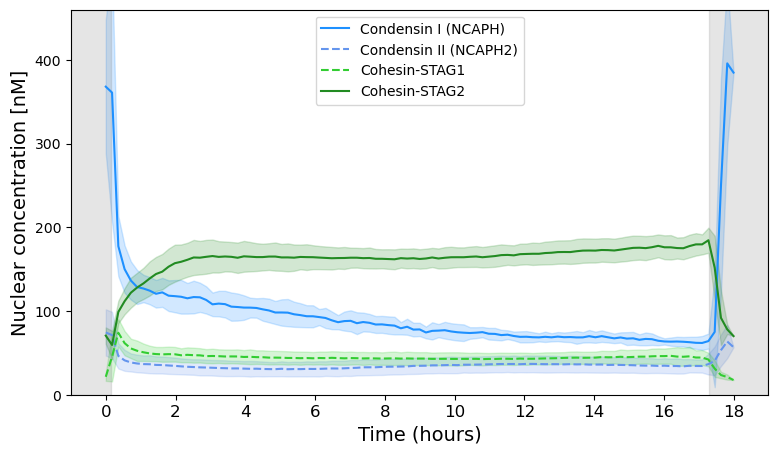

In [31]:
# function to plot same parameter for all POIs in one plot
def plot_isoforms(df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(figsize=(9,5)) 
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH, ax=ax, legend='brief', label=str(df_NCAPH.name), color = NCAPH_color, errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH2, ax=ax, legend='brief', label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = "dashed", errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG1, ax=ax, legend='brief', label=str(df_STAG1.name), color = STAG1_color, linestyle = "dashed", errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG2, ax=ax, legend='brief', label=str(df_STAG2.name), color = STAG2_color, errorbar='sd')
    ax.set_xlim(-1,19)
    ax.set_ylim(0,460)
    plt.axvspan(-2, 0.15, color='grey', alpha=0.2)
    plt.axvspan(17.3,19, color='grey', alpha=0.2)
    ax.set_xticks([0,2,4,6,8,10,12,14,16,18]) 
    ax.set_xticklabels([0,2,4,6,8,10,12,14,16,18], fontsize=12)
    # plt.legend(bbox_to_anchor=(1.02, 0.45), fontsize = 10)
    plt.legend(loc=9)
    plt.xlabel("Time (hours)", fontsize = 14)
    plt.ylabel("Nuclear concentration [nM]", fontsize = 14)
    # plt.savefig(r"M:\Andi\MExit_manuscript_figures\Plots\FCC\Isoforms_Con_nuc_nM_MExit.pdf", dpi=500, format="pdf", transparent=True)
    plt.show()
plot_isoforms(NCAPH_interpolated_norm_con_nuc, NCAPH_color, NCAPH2_interpolated_norm_con_nuc, NCAPH2_color, STAG1_interpolated_norm_con_nuc, STAG1_color, STAG2_interpolated_norm_con_nuc, STAG2_color, 'Con_nuc_nM_MExit')


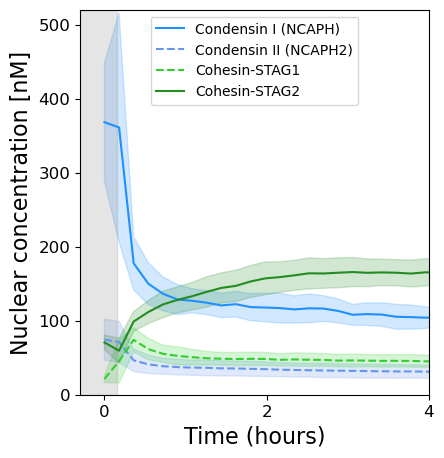

In [32]:
# function to plot same parameter for all POIs in one plot
def plot_isoforms(df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(figsize=(4.5,5)) 
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH, ax=ax, legend='brief', label=str(df_NCAPH.name), color = NCAPH_color, errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH2, ax=ax, legend='brief', label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = "dashed", errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG1, ax=ax, legend='brief', label=str(df_STAG1.name), color = STAG1_color, linestyle = "dashed", errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG2, ax=ax, legend='brief', label=str(df_STAG2.name), color = STAG2_color, errorbar='sd')
    ax.set_xlim(-0.3,4)
    ax.set_ylim(0,520)
    plt.axvspan(-2, 0.15, color='grey', alpha=0.2)
    plt.axvspan(17.3,19, color='grey', alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticks([0,2,4]) 
    # ax.set_xticklabels([0,2,4] ,fontsize=12)
    # plt.legend(bbox_to_anchor=(1.02, 0.45), fontsize = 10)
    plt.legend(loc=9)
    plt.xlabel("Time (hours)", fontsize = 16)
    plt.ylabel("Nuclear concentration [nM]", fontsize = 16)
    # plt.savefig(r"M:\Andi\MExit_manuscript_figures\Plots\FCC\Isoforms_Con_nuc_nM_MExit_0-4h.pdf", dpi=500, format="pdf", transparent=True)
    plt.show()
plot_isoforms(NCAPH_interpolated_norm_con_nuc, NCAPH_color, NCAPH2_interpolated_norm_con_nuc, NCAPH2_color, STAG1_interpolated_norm_con_nuc, STAG1_color, STAG2_interpolated_norm_con_nuc, STAG2_color, 'Con_nuc_nM_MExit')


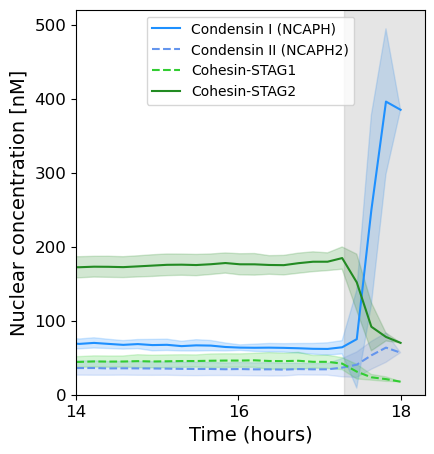

In [67]:
# function to plot same parameter for all POIs in one plot
def plot_isoforms(df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(figsize=(4.5,5)) 
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH, ax=ax, legend='brief', label=str(df_NCAPH.name), color = NCAPH_color, errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH2, ax=ax, legend='brief', label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = "dashed", errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG1, ax=ax, legend='brief', label=str(df_STAG1.name), color = STAG1_color, linestyle = "dashed", errorbar='sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG2, ax=ax, legend='brief', label=str(df_STAG2.name), color = STAG2_color, errorbar='sd')
    ax.set_xlim(14,18.3)
    ax.set_ylim(0,520)
    plt.axvspan(-2, 0.15, color='grey', alpha=0.2)
    plt.axvspan(17.3,19, color='grey', alpha=0.2)
    ax.set_xticks([14,16,18]) 
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(loc=9)
    plt.xlabel("Time (hours)", fontsize = 14)
    plt.ylabel("Nuclear concentration [nM]", fontsize = 14)
    # plt.savefig(r"M:\Andi\MExit_manuscript_figures\Plots\FCC\Isoforms_Con_nuc_nM_MExit_14-18h.pdf", dpi=500, format="pdf", transparent=True)
    plt.show()
plot_isoforms(NCAPH_interpolated_norm_con_nuc, NCAPH_color, NCAPH2_interpolated_norm_con_nuc, NCAPH2_color, STAG1_interpolated_norm_con_nuc, STAG1_color, STAG2_interpolated_norm_con_nuc, STAG2_color, 'Con_nuc_nM_MExit')


# Supplementary Figure Plots

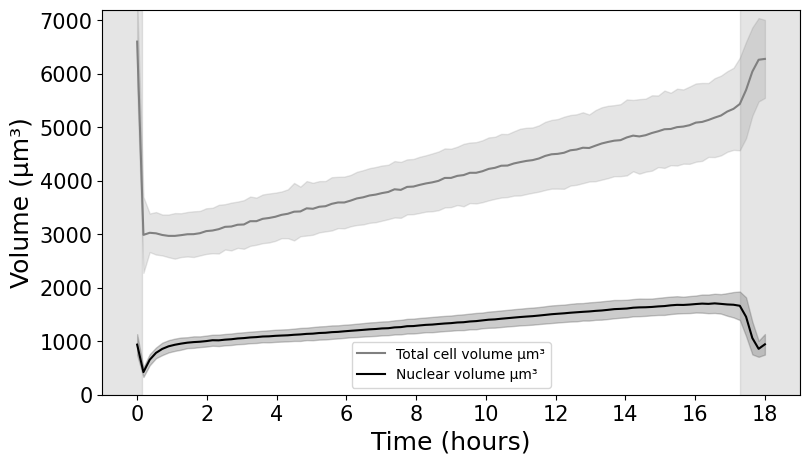

In [71]:
# function to plot same parameter for all POIs in one plot
def volume_plot(df):
    fig, ax = plt.subplots(figsize=(9,5))
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= "Vol_cell_mic3", data = df, ax=ax, legend='brief', label='Total cell volume \u03BCm\u00b3', color = 'grey', errorbar = 'sd')
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= "Vol_nuc_mic3", data = df, ax=ax, legend='brief', label='Nuclear volume \u03BCm\u00b3', color = 'black', errorbar = 'sd')
    ax.set_xlim(-1,19)
    ax.set_ylim(0,7200)
    plt.axvspan(-2, 0.15, color='grey', alpha=0.2)
    plt.axvspan(17.3,19, color='grey', alpha=0.2)
    ax.set_xticks([0,2,4,6,8,10,12,14,16,18]) 
    ax.set_xticklabels([0,2,4,6,8,10,12,14,16,18], fontsize=15)
    plt.yticks(fontsize=15)
    # ax.get_legend().remove()
    plt.xlabel("Time (hours)", fontsize = 18)
    plt.ylabel("Volume (\u03BCm\u00b3)", fontsize = 18)
    plt.savefig(r"M:\Andi\Thesis_Figures\Plots\FCC\volume_plot.pdf", dpi=500, format="pdf", transparent=True)
    # plt.savefig(r"M:\Andi\MExit_manuscript_figures\Figure_01\plots\volume_plot.svg", dpi=500, format="svg", transparent=True)
    plt.show()
volume_plot(concat_all_POI)


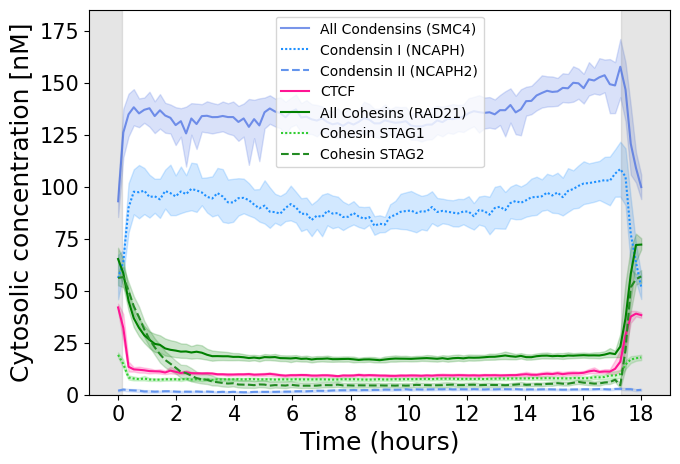

In [13]:
# function to plot same parameter for all POIs in one plot
def plot_all(df_SMC4, SMC4_color, df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color,  df_CTCF, CTCF_color, df_RAD21, RAD21_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot, ylim):
    fig, ax = plt.subplots(figsize=(7.5,5)) 
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_SMC4, ax=ax, legend='brief', label=str(df_SMC4.name), color = SMC4_color, alpha = 0.7)
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH, ax=ax, legend='brief', label=str(df_NCAPH.name), color = NCAPH_color, linestyle = (0, (1,1)))
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_NCAPH2, ax=ax, legend='brief', label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = "dashed")
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_CTCF, ax=ax, legend='brief', label=str(df_CTCF.name), color = CTCF_color)
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_RAD21, ax=ax, legend='brief', label=str(df_RAD21.name), color = RAD21_color)
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG1, ax=ax, legend='brief', label=str(df_STAG1.name), color = STAG1_color, linestyle = (0, (1,1)))
    sns.lineplot(x = "avg_cell_cycle_time_hours", y= what_to_plot, data = df_STAG2, ax=ax, legend='brief', label=str(df_STAG2.name), color = STAG2_color, linestyle = "dashed")
    ax.set_xlim(-1,19)
    ax.set_ylim(0,ylim)
    plt.axvspan(-2, 0.15, color='grey', alpha=0.2)
    plt.axvspan(17.3,19, color='grey', alpha=0.2)
    ax.set_xticks([0,2,4,6,8,10,12,14,16,18]) 
    ax.set_xticklabels([0,2,4,6,8,10,12,14,16,18], fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc=9)
    plt.xlabel("Time (hours)", fontsize = 18)
    plt.ylabel("Cytosolic concentration [nM]", fontsize = 18)
    # plt.savefig(r"M:\Andi\Thesis_Figures\Plots\FCC\All_Con_cyt_nM_MExit.pdf", dpi=500, format="pdf", transparent=True)
    plt.show()
plot_all(SMC4_interpolated_norm_con_nuc, SMC4_color, NCAPH_interpolated_norm_con_nuc, NCAPH_color, NCAPH2_interpolated_norm_con_nuc, NCAPH2_color, CTCF_interpolated_norm_con_nuc, CTCF_color,
         RAD21_interpolated_norm_con_nuc, RAD21_color, STAG1_interpolated_norm_con_nuc, STAG1_color, STAG2_interpolated_norm_con_nuc, STAG2_color, 'Con_cyt_nM_MExit', ylim = 185)


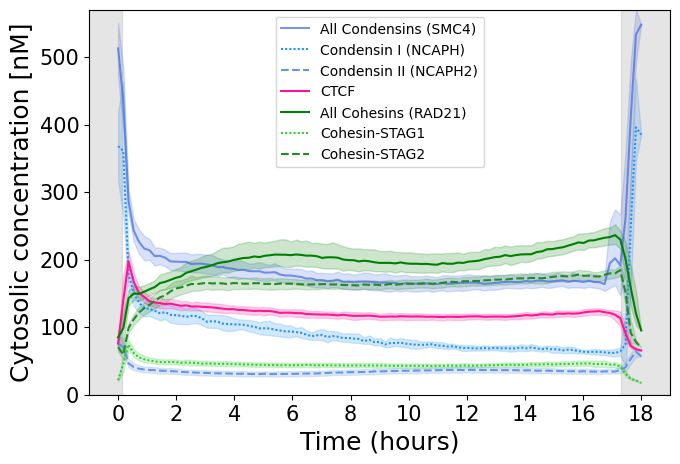

In [29]:
plot_all(SMC4_interpolated_norm_con_nuc, SMC4_color, NCAPH_interpolated_norm_con_nuc, NCAPH_color, NCAPH2_interpolated_norm_con_nuc, NCAPH2_color, CTCF_interpolated_norm_con_nuc, CTCF_color,
         RAD21_interpolated_norm_con_nuc, RAD21_color, STAG1_interpolated_norm_con_nuc, STAG1_color, STAG2_interpolated_norm_con_nuc, STAG2_color, 'Con_nuc_nM_MExit', ylim = 570)

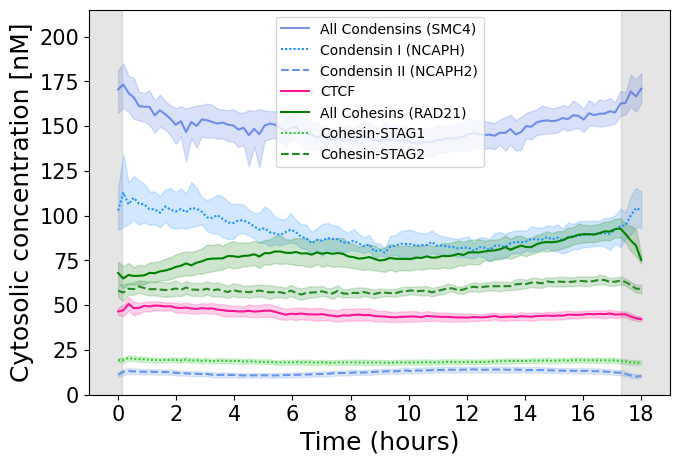

In [30]:
plot_all(SMC4_interpolated_norm_con_nuc, SMC4_color, NCAPH_interpolated_norm_con_nuc, NCAPH_color, NCAPH2_interpolated_norm_con_nuc, NCAPH2_color, CTCF_interpolated_norm_con_nuc, CTCF_color,
         RAD21_interpolated_norm_con_nuc, RAD21_color, STAG1_interpolated_norm_con_nuc, STAG1_color, STAG2_interpolated_norm_con_nuc, STAG2_color, 'Con_cell_nM_MExit', ylim = 215)

## Comparing synchronized with unsynchronized data

In [23]:
def compare_sync_unsync_overlay(df_S, df_US, POI_color, plot_var, path, save = False):
    fig, ax = plt.subplots(1,1, figsize=(4,2.8))
    sns.lineplot(data = df_S, x = "avg_cell_cycle_time_hours", y = str(plot_var), ax = ax, color = 'black', alpha = 0.5, errorbar = 'sd', label = "S-phase synchronized")
    sns.lineplot(data = df_US, x = "avg_cell_cycle_time_hours", y = str(plot_var), ax = ax, color = POI_color, linestyle = "dashed", errorbar = 'sd', label = "unsynchronized")
    plt.ylim(0,)
    plt.xlim(-0.5,)
    plt.legend(fontsize = 8, loc = 4)
    if plot_var == "Vol_cell_mic3":
        plt.ylabel("Cell volume (\u03BCm\u00b3)", fontsize = 10)
    elif plot_var == "N_cell_MExit":
        plt.ylabel("Protein Numbers per Cell", fontsize = 10)
    else:
        plt.ylabel(str(plot_var), fontsize = 10)
    plt.xlabel("Average cell cycle time (hours)", fontsize = 10)
    
    if save == True:
        plt.savefig(path + "compare_" + str(df_S.name) + "_" + str(plot_var) + ".svg", dpi=500, format="svg", transparent=True)
    else:
        pass

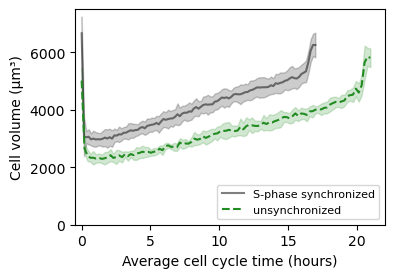

In [24]:
compare_sync_unsync_overlay(STAG2_interpolated_norm_avg_t, STAG2_US_interpolated_norm_avg_t, STAG2_color, "Vol_cell_mic3", path = None, save = False)

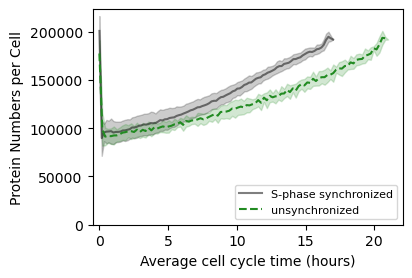

In [25]:
compare_sync_unsync_overlay(STAG2_interpolated_norm_avg_t, STAG2_US_interpolated_norm_avg_t, STAG2_color, "N_cell_MExit", path = None, save = False)

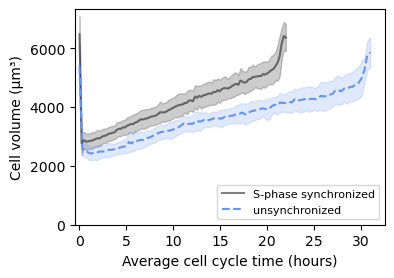

In [26]:
compare_sync_unsync_overlay(NCAPH2_interpolated_norm_avg_t, NCAPH2_US_interpolated_norm_avg_t, NCAPH2_color, "Vol_cell_mic3", path = None, save = False)

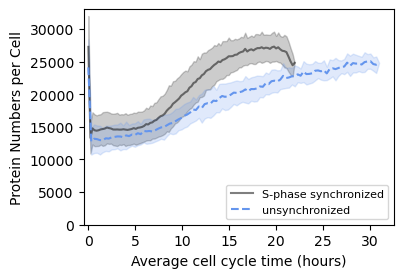

In [27]:
compare_sync_unsync_overlay(NCAPH2_interpolated_norm_avg_t, NCAPH2_US_interpolated_norm_avg_t, NCAPH2_color, "N_cell_MExit", path = None, save = False)

In [28]:
# define box plot to compare value for sync-unsync data 
pd.options.mode.chained_assignment = None  # default='warn'
def boxplot_compare(df_S, df_US, plot_var, palette, path, save = False):
    sync_vals = df_S.loc[df_S["avg_cell_cycle_time_hours"] == 0]
    unsync_vals = df_US.loc[df_US["avg_cell_cycle_time_hours"] == 0]
    sync_vals["synchronisation"] =  'S-phase sync'
    unsync_vals["synchronisation"] =  'unsynchronized'
    concat_data = pd.concat([sync_vals, unsync_vals])
    ymax = concat_data[str(plot_var)].max() *1.2

    fig, ax = plt.subplots(1,1, figsize = (1.3,2.2))
    ax = sns.boxplot(x=concat_data["synchronisation"], y = concat_data[str(plot_var)], palette=palette, boxprops=dict(alpha=.4), showfliers = False)
    ax = sns.stripplot(x=concat_data["synchronisation"], y = concat_data[str(plot_var)], hue = concat_data["synchronisation"], palette=palette, alpha=0.7, size = 4)
    ax.get_legend().remove()
    plt.ylim(0,ymax)
    plt.xticks(rotation=45, ha='right', fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.xlabel("")
    if plot_var == "Vol_cell_mic3":
        plt.ylabel("Cell volume (\u03BCm\u00b3)", fontsize = 8)
    elif plot_var == "N_cell_MExit":
        plt.ylabel("Protein Numbers per Cell (x$10^4$)", fontsize = 8)
        plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    else:
        plt.ylabel(str(plot_var), fontsize = 8)
    
    if save == True:
        plt.savefig(path + "compare_starting_val_" + str(df_S.name) + "_" + str(plot_var) + ".pdf", dpi=500, format="pdf", transparent=True)
    else:
        pass

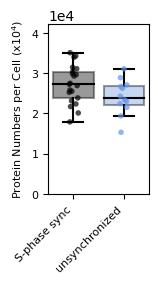

In [29]:
palette = {'S-phase sync': 'black', 'unsynchronized': NCAPH2_color}
boxplot_compare(NCAPH2_interpolated_norm_avg_t, NCAPH2_US_interpolated_norm_avg_t, "N_cell_MExit", palette, path = None, save = False)

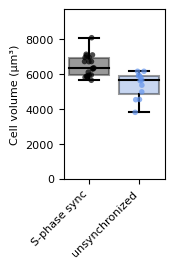

In [30]:
boxplot_compare(NCAPH2_interpolated_norm_avg_t, NCAPH2_US_interpolated_norm_avg_t, "Vol_cell_mic3", palette, path = None, save = False)

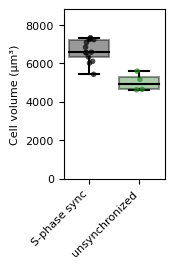

In [31]:
palette_STAG2 = {'S-phase sync': 'black', 'unsynchronized': STAG2_color}
boxplot_compare(STAG2_interpolated_norm_avg_t, STAG2_US_interpolated_norm_avg_t, "Vol_cell_mic3", palette_STAG2, path = None, save = False)

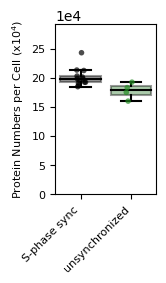

In [32]:
palette_STAG2 = {'S-phase sync': 'black', 'unsynchronized': STAG2_color}
boxplot_compare(STAG2_interpolated_norm_avg_t, STAG2_US_interpolated_norm_avg_t, "N_cell_MExit", palette_STAG2, path = None, save = False)

# STAG2 comparison -synchronized vs asynchronous

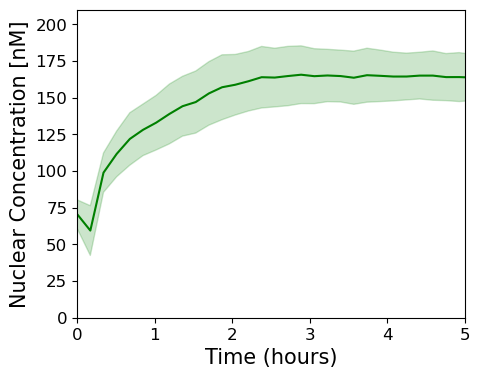

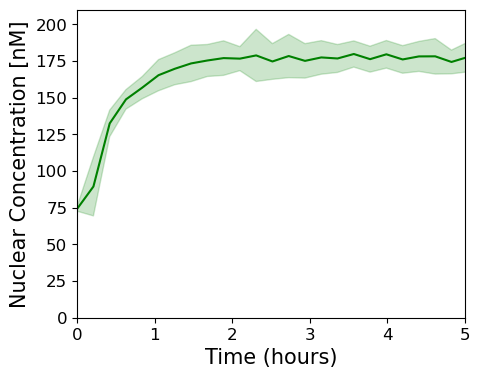

In [12]:
def plot_average_time_series(df, time, plot, color, xlim = None, ylim = None, path = None):
    fig, ax = plt.subplots(1,1, figsize = (5,4))
    sns.lineplot(x = str(time), y = plot, data = df, color = color, errorbar = "sd")
    ax.set_ylim(bottom = 0)
    if xlim != None:
        plt.xlim(0,xlim)
    if ylim != None:
        plt.ylim(0,ylim)
    plt.ylabel('Nuclear Concentration [nM]', fontsize = 15)
    plt.xlabel('Time (hours)', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    if path != None:
        plt.savefig(path + ".pdf", dpi=500, format="pdf", transparent=True)

plot_average_time_series(STAG2_interpolated_avg_t, 'avg_cell_cycle_time_hours', "Con_nuc_nM_MExit", "green", xlim = 5, ylim = 210, path = None)
plot_average_time_series(STAG2_US_interpolated_avg_t, 'avg_cell_cycle_time_hours', "Con_nuc_nM_MExit", "green", xlim = 5, ylim = 210, path = None)